In [19]:
from pandas import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np

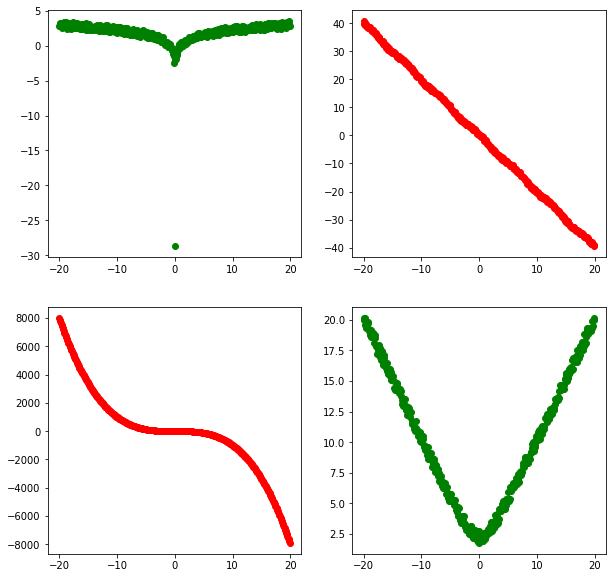

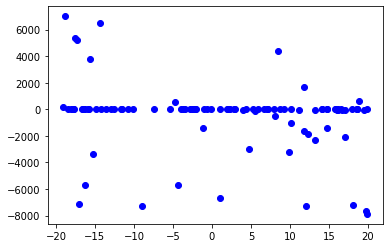

In [20]:
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')

x = pd.DataFrame(train_data.index)
y1 = pd.DataFrame(train_data['y1'])
y2 = pd.DataFrame(train_data['y2'])
y3 = pd.DataFrame(train_data['y3'])
y4 = pd.DataFrame(train_data['y4'])

fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0, 0].plot(x, y1,'go')

axs[0, 1].plot(x, y2, 'ro')

axs[1, 0].plot(x, y3, 'ro')

axs[1, 1].plot(x, y4, 'go')

test_data = pd.read_csv('data/test.csv', index_col=0, delimiter=',')

x = pd.DataFrame(test_data.index)
y = pd.DataFrame(test_data['y'])
plt.show()

plt.plot(x,y,'bo')
plt.show()

In [267]:
from scipy import signal
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
test_data = pd.read_csv('data/test.csv', index_col=0, delimiter=',')
functions = {}
max_indexs = {}
final = {}
ideal_df = pd.DataFrame(ideal_data)
test_df = pd.DataFrame(test_data)
x = pd.DataFrame(train_data.index)
for r in range(1,51):
   
    i = pd.DataFrame(ideal_data['y'+str(r)])

    j = pd.DataFrame(train_data['y1'])
    k = pd.DataFrame(train_data['y2'])
    l = pd.DataFrame(train_data['y3'])
    m = pd.DataFrame(train_data['y4'])

    normy1 = np.linalg.norm(i)
    ny1 = i/normy1

    normy2 = np.linalg.norm(j)
    ny2 = j/normy2

    normy3 = np.linalg.norm(k)
    ny3 = k/normy3

    normy4 = np.linalg.norm(l)
    ny4 = l/normy4

    normy5 = np.linalg.norm(m)
    ny5 = m/normy5

   
    s = signal.correlate(ny1, ny2,'full')
    max_index = np.argmax(s)
    max_indexs[str(r)+str(1)]=max_index
    mean_x = np.mean(x)[0]
    mean_y = np.mean(ny2)[0]
    std_x  = np.std(x)[0]
    std_y  = np.std(ny2)[0]
    n      = len(ny1)
    x = signal.correlate(ny1 - mean_x, ny2 - mean_y, mode = 'valid')[0]/n/(std_x * std_y)
    functions[str(r)+':'+str(1)] = x

    s = signal.correlate(ny1, ny3,'full')
    max_index = np.argmax(s)
    max_indexs[str(r)+str(2)]=max_index
    mean_x = np.mean(x)[0]
    mean_y = np.mean(ny3)[0]
    std_x  = np.std(x)[0]
    std_y  = np.std(ny3)[0]
    n      = len(ny1)
    x = signal.correlate(ny1 - mean_x, ny3 - mean_y, mode = 'valid')[0]/n/(std_x * std_y)
    functions[str(r)+':'+str(2)] = x

  
    s = signal.correlate(ny1, ny4, 'full')
    max_index = np.argmax(s)
    max_indexs[str(r)+str(3)]=max_index  
    mean_x = np.mean(x)[0]
    mean_y = np.mean(ny4)[0]
    std_x  = np.std(x)[0]
    std_y  = np.std(ny4)[0]
    n      = len(ny1)
    x = signal.correlate(ny1 - mean_x, ny4 - mean_y, mode = 'valid')[0]/n/(std_x * std_y)
    functions[str(r)+':'+str(3)] = x


    s = signal.correlate(ny1, ny5, mode='full')
    max_index = np.argmax(s)
    max_indexs[str(r)+str(4)]=max_index 
    mean_x = np.mean(x)[0]
    mean_y = np.mean(ny5)[0]
    std_x  = np.std(x)[0]
    std_y  = np.std(ny5)[0]
    n      = len(ny1)
    x = signal.correlate(ny1 - mean_x, ny5 - mean_y, mode = 'valid')[0]/n/(std_x * std_y)
    functions[str(r)+':'+str(4)] = x

final = (sorted(functions.items(), key=lambda kv: kv[1]))
final = final[-4:]


count = 0
fig, axs = plt.subplots(4, figsize=(30,30))

for f in final:
    index = f[0].split(':')[0]
    for i in ideal_df:
        axs[count].plot(x,ideal_df[i], 'bo')
    axs[count].plot(x,ideal_df['y'+index],'ro')
 
# normt = np.linalg.norm(test_df)
# nt = ideal_df/normt  
# for f in final:
#     index = f[0].split(':')[0]
#     for t in test_df:
#         axs[count].plot(test_df[t], 'bo')
#     axs[count].plot(ideal_df['y'+index],'ro')
    
    count+=1
   
for f in final:
    index = f[0].split(':')[0]
    index += f[0].split(':')[1]
    print(max_indexs[index])
 

IndexError: invalid index to scalar variable.

In [22]:
import scipy.optimize as optimization


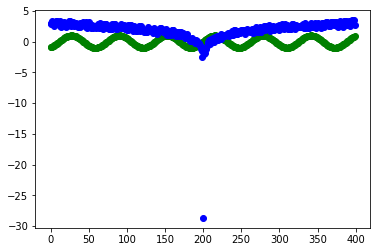

In [189]:


import scipy.optimize as optimization

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
a = pd.DataFrame(ideal_data['y1'])
b = pd.DataFrame(train_data['y1'])

y_data_1 = np.array(a)
y_data_2 = np.array(b)

# Initial guess.
x0   = np.zeros(400)

y_data_1=y_data_1.reshape(400)
y_data_2=y_data_2.reshape(400)

def func(params,datay1,datay2):
    return datay1 - np.dot(datay2, params)

o=optimization.leastsq(func,x0, args=(y_data_1, y_data_2))
o = np.array(o[0])
c = pd.DataFrame(o)



plt.plot(y_data_1,'go')
plt.plot(y_data_2,'bo')


In [190]:

import lmfit
###############################################################################
# read the data into a pandas DataFrame, and use the 'x' and 'y' columns:
data1 = pd.read_csv('data/train.csv')
dframe1 = pd.DataFrame(data1)
data2 = pd.read_csv('data/ideal.csv')
dframe2 = pd.DataFrame(data2)

model = QuadraticModel()
params = model.guess(dframe2['y45'],x=dframe2.index)

result = model.fit(dframe2['y45'],params,  x=dframe2.index)

###############################################################################
# and gives the plot and fitting results below:
result.plot_fit()

#base = plt.gca().transData
#rot = transforms.Affine2D().rotate_deg(180)
#plt.plot(result,transform=rot+base)
#plt.show()
print(result.fit_report())
#result.params.pretty_print()

# chi-sqr
print (result.chisqr)
# reduce chi-sqr
print (result.redchi)
#Akaike info crit
print (result.aic)
#Bayesian info crit
print (result.bic)

NameError: name 'QuadraticModel' is not defined

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [ ]:
A = np.vstack([x, np.ones(len(x))]).T

In [ ]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

In [ ]:
m, c

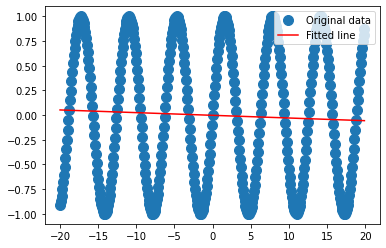

In [118]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [217]:
ideal_data = pd.read_csv('data/ideal.csv', index_col=0, delimiter=',')
train_data = pd.read_csv('data/train.csv', index_col=0, delimiter=',')
i = pd.DataFrame(ideal_data)
x = pd.DataFrame(train_data.index)

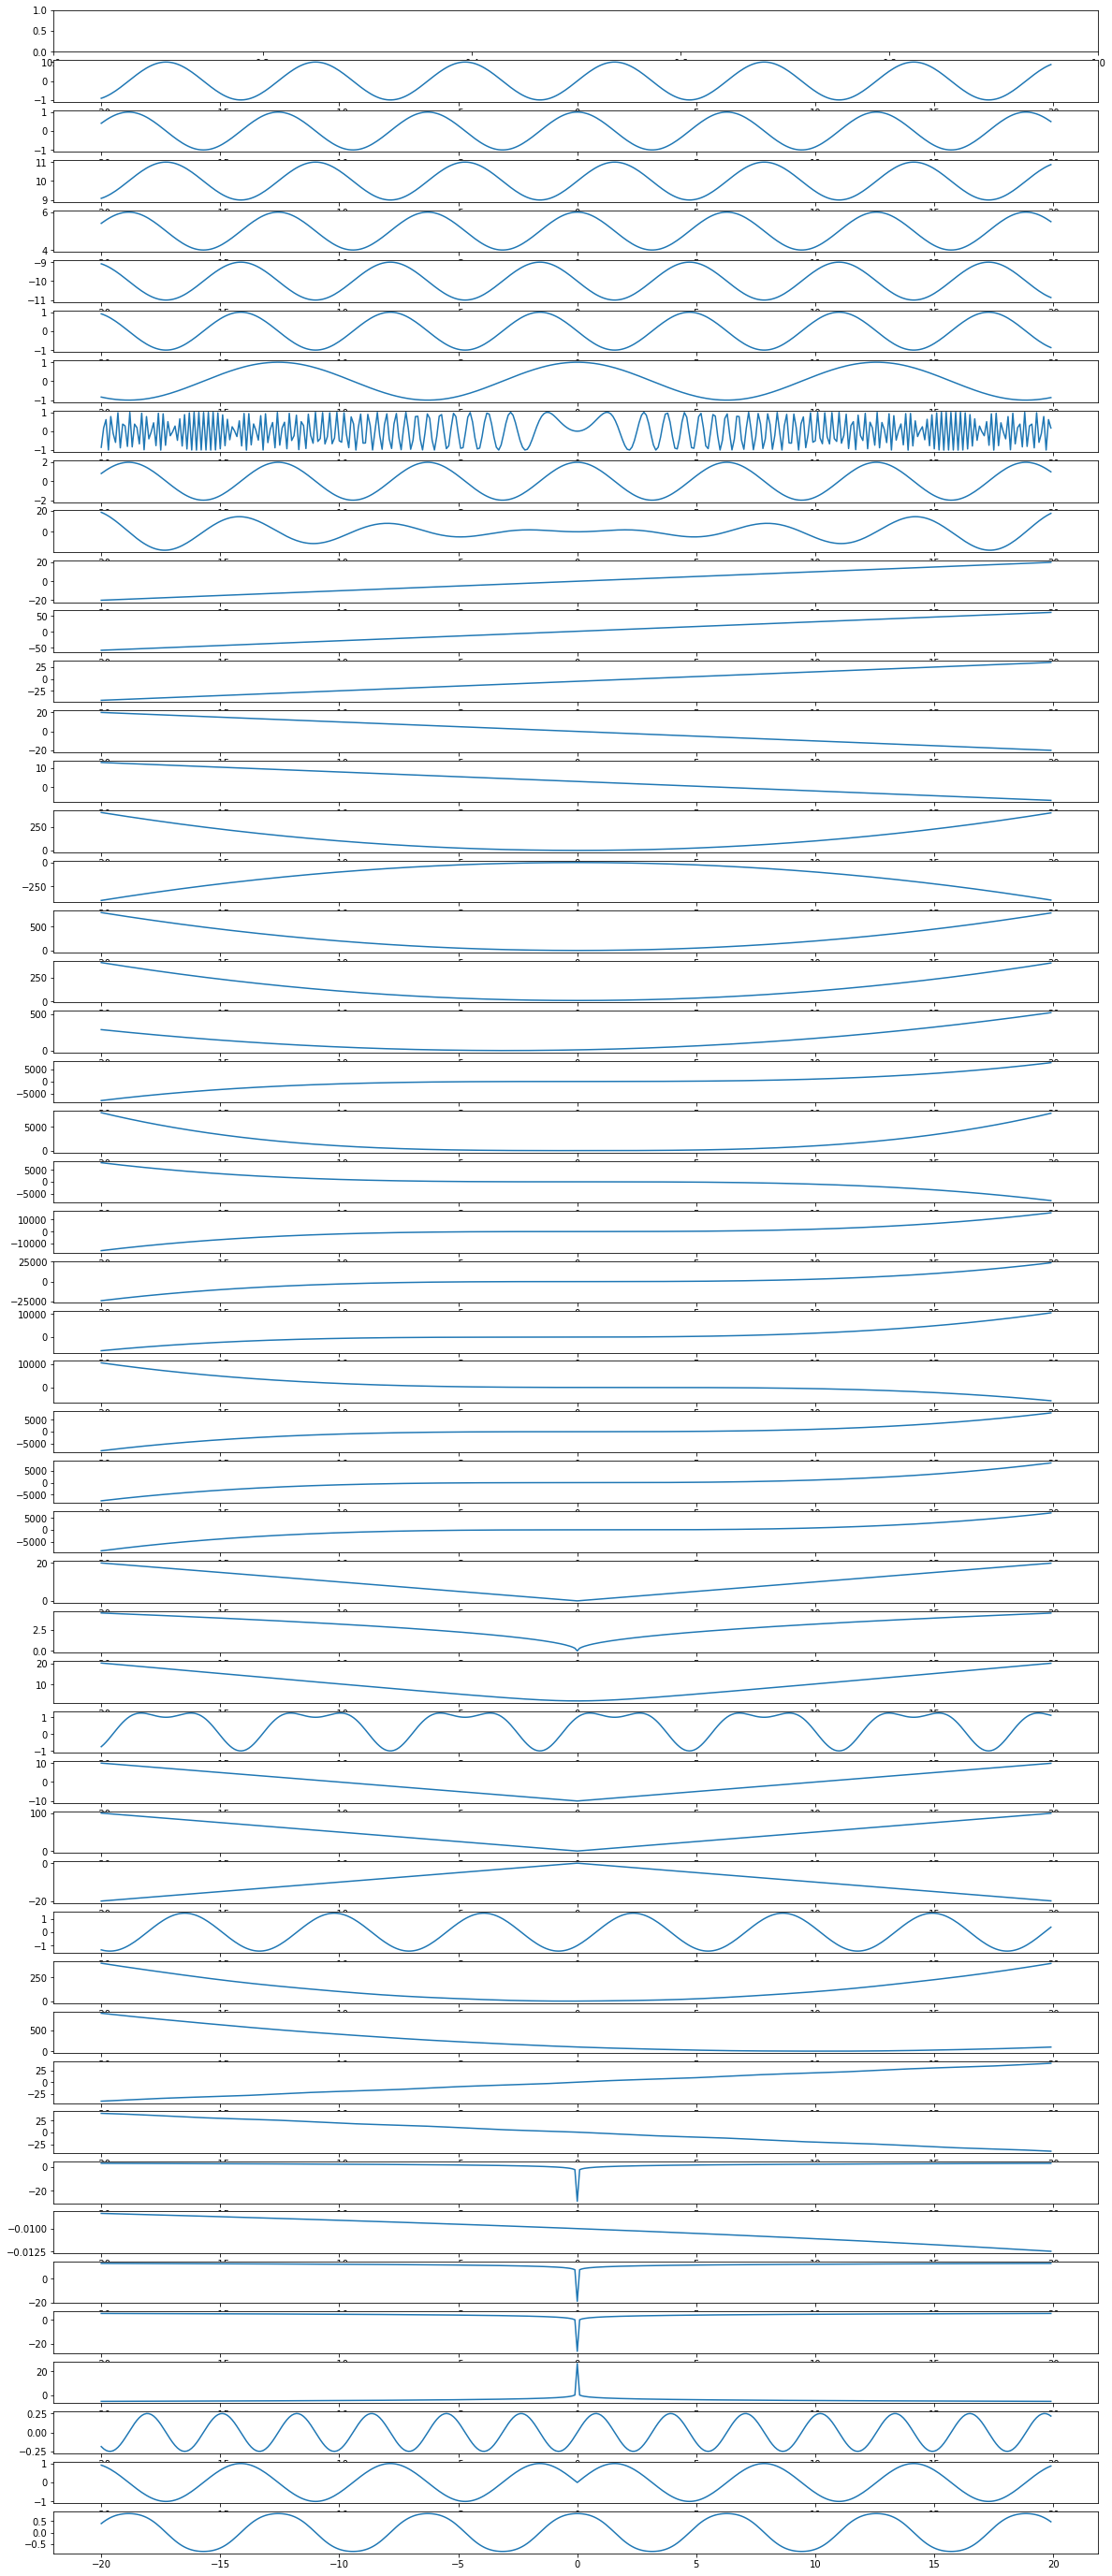

In [251]:
fig, axs = plt.subplots(51,1, figsize=(20,50))
for r in range(1,51):
    i = pd.DataFrame(ideal_data['y'+str(r)])
    axs[r].plot(i)

    


In [171]:
x = np.array(id.index)
y = np.array(id['y4'])

In [172]:
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, x, rcond=None)[0]

In [173]:
m, c

(0.9999999999999996, -4.335199729622131e-17)

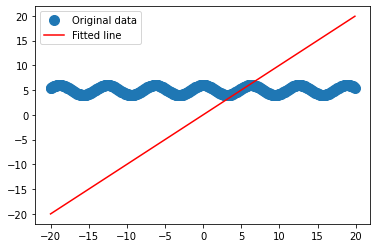

In [174]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [176]:
from scipy import optimize
def y(theta, t):
    return theta[0] / (1 + np.exp(- theta[1] * (t - theta[2])))

ts = np.linspace(0, 1)
K = 1; r = 10; t0 = 0.5; noise = 0.1
ys = y([K, r, t0], ts) + noise * np.random.rand(ts.shape[0])

def fun(theta):
    return y(theta, ts) - ys


res1 = optimize.least_squares(fun, theta0)


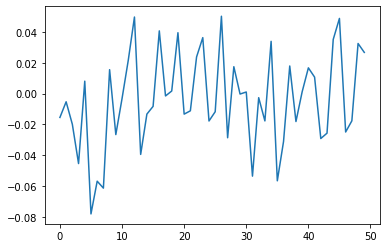

In [188]:
plt.plot(res1['fun'])